* SJSU ID - 010816832
* VIDYA COIMBATORE NAND KUMAR
### * Alternus Vera Assignment

## **Influence of Political Affiliation **

* The aim of the project is to develop a classifer to help identify fake news from real news. The subject of fake news became popular in connection with the recent US presidential elections and with possible Russian meddling into elections in the US, France, and Germany. 
* The project uses kaggle fake news dataset
* The dataset has been trained using a datacamp's dataset 'https://s3.amazonaws.com/assets.datacamp.com/blog_assets/fake_or_real_news.csv' containing credible news from left, center and the right wings of politics.
*  MultinomialNB algorithm has been applied and fits a model with .92 accuracy score.



In [302]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier

### Load datacamp dataset

In [303]:
dt = pd.read_csv("fake_or_real_news.csv")

In [304]:
dt.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [305]:
dt = dt.set_index("Unnamed: 0")

In [306]:
dt.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [307]:

# Checking the balance of REAL and FAKE labels
dt.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [308]:
from sklearn.model_selection import train_test_split

In [309]:
#Set 'x' as text and `y` as label 
y = dt.label 
 
# Drop the `label` column 
dt.drop("label", axis=1) 
 
# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(dt['text'], y, test_size=0.33, random_state=53)

In [310]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [311]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

### Train the model with REAL and FAKE labels

In [312]:
# Initialize the `tfidf_vectorizer`
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [313]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [314]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Plot Confusion Matrix

In [315]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Applying Multinomial Naive-Bayes algorithm

In [316]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools

In [317]:
clf = MultinomialNB()

accuracy:   0.857
Confusion matrix, without normalization


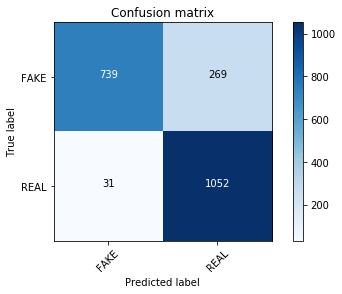

In [318]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
#rocauc = metrics.roc_auc_score(y_test, pred, average='weighted')
print ("accuracy:   %0.3f" % score)
#print ("ROC_AUC score:  %.3f" % rocauc)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.893
Confusion matrix, without normalization


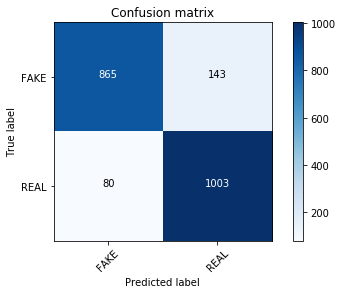

In [319]:
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.939
Confusion matrix, without normalization


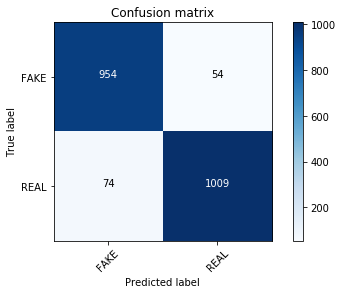

In [320]:

linear_clf = PassiveAggressiveClassifier(n_iter=50)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Model is fit and trained!

In [321]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -4.8463792383087885 2016
FAKE -4.146134531667497 hillary
FAKE -4.1380205968114065 october
FAKE -3.13940050206656 share
FAKE -2.909220994763067 november
FAKE -2.9047024662328704 article
FAKE -2.558854430292382 print
FAKE -2.443642471018766 email
FAKE -2.4059649765785296 oct
FAKE -2.40071701169137 advertisement
FAKE -2.219678846824938 mosul
FAKE -2.146455314091665 source
FAKE -2.1390821075091635 establishment
FAKE -2.1292335754085676 podesta
FAKE -2.0947416832007875 election
FAKE -2.025016681841769 war
FAKE -1.9990227080396354 26
FAKE -1.9812222831486217 nov
FAKE -1.9681703285335825 wikileaks
FAKE -1.8303224771702817 corporate
FAKE -1.818063117120352 com
FAKE -1.8157416941731341 jewish
FAKE -1.7929378321729068 photo
FAKE -1.7741423427120788 snip
FAKE -1.7088624557091194 soros
FAKE -1.6649219211758426 brexit
FAKE -1.6511241544696982 ayotte
FAKE -1.6486128194227199 dr
FAKE -1.6405558933344173 uk
FAKE -1.6390370184313767 pipeline

REAL 4.924797830340727 said
REAL 2.52875004556926 says


## Load the Kaggle Dataset

In [322]:
%matplotlib inline
#!conda install -c conda-forge tldextract -y
#!conda install -c conda-forge/label/gcc7 tldextract -y
#!pip install tldextract
import time
import re
import tldextract

In [323]:
f = pd.read_csv('fake.csv')

In [324]:
f.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [325]:
## Check type value counts

f.type.value_counts()

bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: type, dtype: int64

## Plot frequency of Observations by type

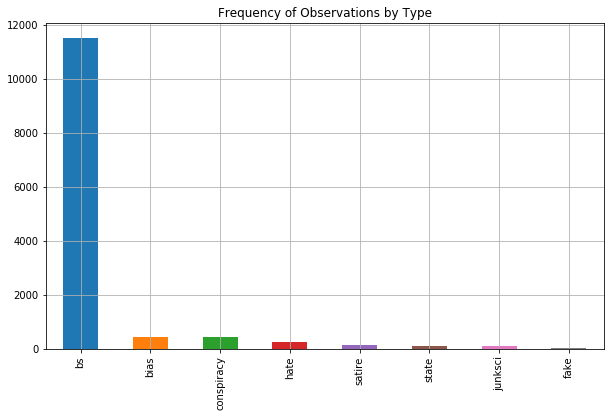

In [326]:

plt.figure(figsize=(10,6))
f.type.value_counts().plot(kind='bar',title = 'Frequency of Observations by Type', grid = True)

## Plot frequency of Observations by Language

In [327]:
len(f.language.unique())

16

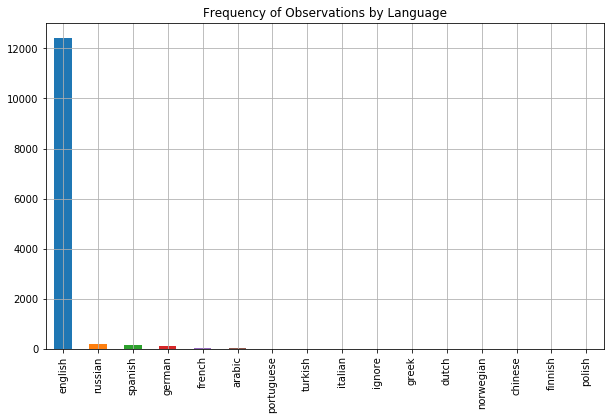

In [328]:
plt.figure(figsize=(10,6))
f.language.value_counts().plot(kind='bar',title = 'Frequency of Observations by Language', grid = True)

#### ==> Dataset contains most observations in English

### Calculate text length and assign to a new column textlen

In [329]:
l = []
for i in range(len(f.text)):
    l.append(len(str(f.text[i])))
l = pd.DataFrame(l)
f['textlen'] = l
f.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,textlen
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,...,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,505
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,...,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,1789
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,...,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,1363
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,...,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,271
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,2095


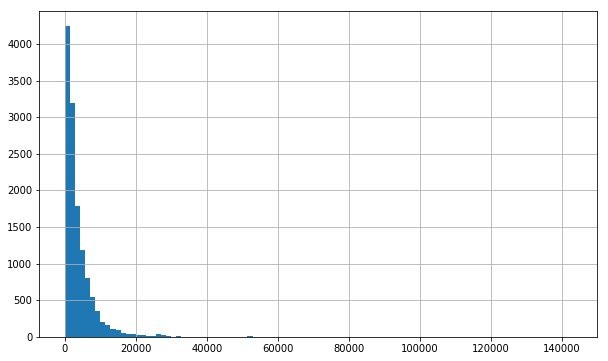

In [330]:
plt.figure(figsize=(10,6))
f.textlen.hist(bins = 100)

### Consider only English and text length >500 and <12000

In [331]:
f = f[(f.type == 'bs')|(f.type == 'fake')]
f = f[f.language == 'english']
f = f[(f.textlen > 500)&(f.textlen < 12000)]
f = f[['site_url', 'title', 'text']]
f.reset_index(drop = 'index', inplace=True)
f.rename(columns = {'site_url':'url'}, inplace=True)
print(f.shape)
f.head()

(8841, 3)


,url,title,text
0,abcnews.com.co,The Amish In America Commit Their Vote To Dona...,18 SHARE The Amish in America have committed t...
1,abcnews.com.co,Obama Signs Executive Order Declaring Investig...,64 SHARE President Obama has signed an Executi...
2,abeldanger.net,NaN,Here is the problem . The USA constitution sta...
3,abeldanger.net,NaN,There is plenty of proof the machines are rigg...
4,abeldanger.net,NaN,"He has got to go after him , he is the one cau..."


In [332]:
f.url.value_counts()

thefederalistpapers.org        100
occupydemocrats.com            100
conservativetribune.com        100
thedailymash.co.uk             100
theonion.com                   100
waterfordwhispersnews.com      100
yournewswire.com               100
madworldnews.com               100
opednews.com                    99
thespoof.com                    99
liberalamerica.org              99
ifyouonlynews.com               99
trunews.com                     99
libertyunyielding.com           99
pravdareport.com                98
eutimes.net                     98
truthfeed.com                   97
topinfopost.com                 97
freedomoutpost.com              97
dcclothesline.com               96
thedailysheeple.com             96
antiwar.com                     96
fellowshipoftheminds.com        96
ijr.com                         94
blacklistednews.com             93
govtslaves.info                 93
wearechange.org                 93
rinf.com                        93
worldtruth.tv       

In [333]:
f.url.value_counts()[:200].sum()

8831

### Create columns wing, label, fake, conspiracy and satire 

In [334]:
f['label'] = 'FAKE'
f['wing'] = '0-unknown'
f['conspiracy'] = 0
f['satire'] = 0


In [335]:
f.head()

,url,title,text,label,wing,conspiracy,satire
0,abcnews.com.co,The Amish In America Commit Their Vote To Dona...,18 SHARE The Amish in America have committed t...,FAKE,0-unknown,0,0
1,abcnews.com.co,Obama Signs Executive Order Declaring Investig...,64 SHARE President Obama has signed an Executi...,FAKE,0-unknown,0,0
2,abeldanger.net,NaN,Here is the problem . The USA constitution sta...,FAKE,0-unknown,0,0
3,abeldanger.net,NaN,There is plenty of proof the machines are rigg...,FAKE,0-unknown,0,0
4,abeldanger.net,NaN,"He has got to go after him , he is the one cau...",FAKE,0-unknown,0,0


#### Based on news resources at  https://mediabiasfactcheck.com ,  identify the political affiliation for each news aggregator and mark as 'center' 'left' or 'right'

In [336]:

f.loc[f.url.str.contains('consortiumnews|usatoday|politifact|sctimes|timesofsandiego'),'wing'] = '4-center'
f.loc[f.url.str.contains('presstv|mintpressnews|latimes|chicagotribune|bustle|natmonitor|politico'),'wing'] = '3-center left'
f.loc[f.url.str.contains('antiwar|russia-insider|sputniknews|strategic-culture|postbulletin|hpenews|ustfactsdaily'),'wing'] = '5-center right'
f.loc[f.url.str.contains('politicususa|opednews|liberalamerica|truthdig|counterpunch|blackagendareport|guardianlv|ahtribune|intrepidreport|wakingtimes|addictinginfo|activistpost|other98|countercurrents|huffingtonpost|rabble|cnn'),'wing'] = '2-left'
f.loc[f.url.str.contains('naturalnews|ijr|wearechange|awdnews|twitchy|thenewamerican|amtvmedia|abovetopsecret|nowtheendbegins|thecommonsenseshow|fromthetrenchesworldreport|nakedcapitalism|prisonplanet|investmentwatchblog|ronpaulinst|thecontroversialfiles|gulagbound|rt|thedailybell|corbettreport|zerohedge|whatreally|wikileaks|newstarg|regated|southfront'),'wing'] = '6-right'
f.loc[f.url.str.contains('occupydemocrats|ifyouonlynews|pravdareport|usuncut|newcenturytimes|trueactivist|dailynewsbin'),'wing'] = '1-extreme left'
f.loc[f.url.str.contains('madworldnews|thefederalistpapers|conservativetribune|libertyunyielding|truthfeed|freedomoutpost|frontpagemag|dccl|othesline|wnd|ihavethetruth|amren|barenakedislam|returnofkings|trunews|jewsnews|shtfplan|lewrockwell|dailystormer|libertynews|endingthefield|dailywire|vdare|100percentfedup|21stcenturywire|westernjournalism|redflagnews|libertywritersnews|conservativedailypost|departed|breitbart|donaldtrumpnews.co|bipartisanreport|americanlookout|spinzon|usapoliticsnow|usanewsflash|hangthebankers|toprightnews|usasupreme|americasfreedomfighters|viralliberty'),'wing'] = '7-extreme right'

#### Based on news resources at    https://mediabiasfactcheck.com ,  identify the political affiliation for each news aggregator and mark as 'conspiracy'

In [337]:
f.loc[f.url.str.contains('yournewswire|trunews|naturalnews|infowars|eutimes|truthfeed|topinfopost|thedailysheeple|jewsnews|wearechange|awdnews|worldtruth|govtslaves|thetruthseeker.co|amtvmedia|sott|abovetopsecret.com|collective-evolution.com|shtfplan.com|theeventchronicle.com|thefreethoughtproject.com|humansarefree.com|veteranstoday.com|lewrockwell.com|nowtheendbegins.com|thecommonsenseshow.com|themindunleashed.comfromthetrenchesworldreport.com|intellihub.com|realfarmacy.com|greanvillepost.com|dailystormer.com|disclose.tv|whydontyoutrythis.com|prisonplanet.com|investmentwatchblog.com|thecontroversialfiles.net|godlikeproductions.com|anonhq.com|abeldanger.net|wakingtimes.com |gulagbound.com|endingthefed.com|healthimpactnews.com|truthbroadcastnetwork.com|21stcenturywire.com|corbettreport.com|undergroundhealth.com|zerohedge.com|geoengineeringwatch.org|conservativedailypost.com|pakalertpress.com|whatreallyhappened.com|coasttocoastam.com|trueactivist.com|activistpost.com|theantimedia.org|usapoliticsnow.com|newstarget.com|theearthchild.co.za|anonews.co|southfront.org|americasfreedomfighters.com|davidwolfe.com|vigilantcitizen.com'),'conspiracy'] = 1

#### Based on news resources at     https://mediabiasfactcheck.com ,  identify the political affiliation for each news aggregator and mark as 'satire'

In [338]:
f.loc[f.url.str.contains('waterfordwhispersnews|theonion|thedailymash|thespoof|clickhole|newsthump|newsbiscuit|theunrealtimes|dailysquib|adobochronicles|gomerblog|thelastlineofdefense|satirewire|reductress'),'satire'] = 1

In [339]:

f.wing.value_counts()

0-unknown          4492
7-extreme right    1669
6-right            1515
2-left              551
5-center right      273
1-extreme left      249
3-center left        92
Name: wing, dtype: int64

In [340]:
f.head()

,url,title,text,label,wing,conspiracy,satire
0,abcnews.com.co,The Amish In America Commit Their Vote To Dona...,18 SHARE The Amish in America have committed t...,FAKE,0-unknown,0,0
1,abcnews.com.co,Obama Signs Executive Order Declaring Investig...,64 SHARE President Obama has signed an Executi...,FAKE,0-unknown,0,0
2,abeldanger.net,NaN,Here is the problem . The USA constitution sta...,FAKE,0-unknown,1,0
3,abeldanger.net,NaN,There is plenty of proof the machines are rigg...,FAKE,0-unknown,1,0
4,abeldanger.net,NaN,"He has got to go after him , he is the one cau...",FAKE,0-unknown,1,0


0-unknown          4492
7-extreme right    1669
6-right            1515
2-left              551
5-center right      273
1-extreme left      249
3-center left        92
Name: wing, dtype: int64

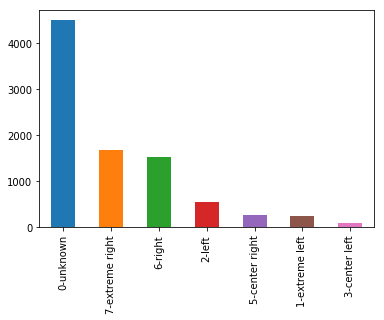

In [341]:
f.wing.value_counts().plot(kind = 'bar')
f.wing.value_counts()

In [342]:
z_z = pd.DataFrame()
z_ = []
for i in sorted(f.wing.unique()):
    cvec = CountVectorizer(stop_words='english')
    cvec.fit(f[f.wing == i].text)
    cvecdata = cvec.transform(f[f.wing == i].text)
    df = pd.DataFrame(cvecdata.todense(),
                     columns = cvec.get_feature_names())
    z_ = pd.DataFrame(df.sum())
    z_.columns = ["sums"]
    z_ = pd.DataFrame(z_.sums.sort_values(ascending=False)[:100]/float(z_.sum())*100)
    z_z = pd.concat([z_z,z_], axis = 1)
z_z.columns = f.wing.unique()
z_z.dropna(inplace = True)
print(z_z.shape)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if sys.path[0] == '':


(29, 7)


In [343]:
z_z = z_z[sorted(f.wing.unique())]
z_z['mean'] = z_z.mean(axis=1)
z_z = z_z.sort_values(by = "mean", ascending=False)[:10]
z_z.to_csv("fake_word_freq.csv")
z_z

,0-unknown,1-extreme left,2-left,3-center left,5-center right,6-right,7-extreme right,mean
trump,0.527191,0.760865,0.645889,0.940215,0.296505,2.383475,0.361353,0.845070
clinton,0.539320,0.671069,0.468042,1.105976,0.395339,0.720949,0.817487,0.674026
people,0.447923,0.497629,0.550370,0.471590,0.324345,0.444730,0.506487,0.463296
said,0.387848,0.400334,0.257446,0.559781,0.413436,0.463840,0.713820,0.456644
hillary,0.338618,0.422831,0.248349,0.877962,0.224118,0.531591,0.299153,0.420375
2016,0.252858,0.374760,0.194222,0.384139,0.199062,0.436044,0.467982,0.329867
new,0.321709,0.323613,0.315212,0.321392,0.328522,0.307489,0.328772,0.320958
election,0.267199,0.267658,0.245620,0.432805,0.136420,0.644511,0.239915,0.319161
just,0.329129,0.264774,0.244255,0.362400,0.158693,0.491635,0.231029,0.297416
president,0.222963,0.312076,0.261994,0.308794,0.300681,0.408248,0.142172,0.279561


In [344]:
df.head()

,00,000,000km,001,007,00o,01,015,018,02,...,ź300,ź4,ź50,за,эa,эin,эthe,إنفوجرافيك,السعودية,ノhillbro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [345]:

f.groupby('wing').sum()

,conspiracy,satire
wing,,
0-unknown,1805,645
1-extreme left,9,0
2-left,0,0
3-center left,0,0
5-center right,0,0
6-right,641,0
7-extreme right,547,0


### Most frequent words for Satirical articles

In [346]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(f[f.satire == 1].text)
cvecdata = cvec.transform(f[f.satire == 1].text)
df = pd.DataFrame(cvecdata.todense(),
                 columns = cvec.get_feature_names())
z_ = pd.DataFrame(df.sum())
z_.columns = ["percent"]
z_ = pd.DataFrame(z_.percent.sort_values(ascending=False)[:100]/float(z_.sum())*100)
z_.head(10)

,percent
trump,0.805168
just,0.633591
said,0.603876
2016,0.506106
like,0.432299
people,0.426548
new,0.425589
time,0.392040
election,0.374787
day,0.319192


In [347]:
# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(f.text)
y = f.label

In [348]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [349]:
pred = clf.predict(tfidf_test)

In [350]:
pred_df = pd.DataFrame(pred)
pred_df[0].value_counts()

FAKE    8165
REAL     676
Name: 0, dtype: int64

In [351]:
score = metrics.accuracy_score(y, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.924


### Accuracy:   0.924 on test data

In [353]:
f['pred'] = pred

In [354]:
f.head()

,url,title,text,label,wing,conspiracy,satire,pred
0,abcnews.com.co,The Amish In America Commit Their Vote To Dona...,18 SHARE The Amish in America have committed t...,FAKE,0-unknown,0,0,FAKE
1,abcnews.com.co,Obama Signs Executive Order Declaring Investig...,64 SHARE President Obama has signed an Executi...,FAKE,0-unknown,0,0,FAKE
2,abeldanger.net,NaN,Here is the problem . The USA constitution sta...,FAKE,0-unknown,1,0,FAKE
3,abeldanger.net,NaN,There is plenty of proof the machines are rigg...,FAKE,0-unknown,1,0,FAKE
4,abeldanger.net,NaN,"He has got to go after him , he is the one cau...",FAKE,0-unknown,1,0,FAKE


In [355]:
z = pd.concat([f[f.pred == "FAKE"].wing.value_counts(),f[f.pred == "REAL"].wing.value_counts()],
              join='outer', axis = 1 ,sort=True)

In [356]:
z.columns = ['FAKE', 'REAL']
z['TOTAL'] = z.REAL + z.FAKE
z['REAL'] = z.REAL/(z.FAKE +z.REAL)
z.to_csv('z_pred.csv')

z

,FAKE,REAL,TOTAL
0-unknown,4279,0.047418,4492
1-extreme left,195,0.216867,249
2-left,505,0.083485,551
3-center left,84,0.086957,92
5-center right,254,0.069597,273
6-right,1407,0.071287,1515
7-extreme right,1441,0.136609,1669


In [357]:

# politicalinfluence% = 3886/(3886+4279)*100
# nonpoliticalinfluence% = 4279/(3886+4279)*100
#

#### * This shows that the credibility of Unknown vs known political spectres is almost 52%-47%
The influence of Fake news detection for known political spectres is 47%
The influence of Fake news detection for known Non-political spectres is 52%

In [358]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    #print(class_labels)
    feature_names = vectorizer.get_feature_names()
    #print(feature_names)
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=50)

FAKE -4.8463792383087885 2016
FAKE -4.146134531667497 hillary
FAKE -4.1380205968114065 october
FAKE -3.13940050206656 share
FAKE -2.909220994763067 november
FAKE -2.9047024662328704 article
FAKE -2.558854430292382 print
FAKE -2.443642471018766 email
FAKE -2.4059649765785296 oct
FAKE -2.40071701169137 advertisement
FAKE -2.219678846824938 mosul
FAKE -2.146455314091665 source
FAKE -2.1390821075091635 establishment
FAKE -2.1292335754085676 podesta
FAKE -2.0947416832007875 election
FAKE -2.025016681841769 war
FAKE -1.9990227080396354 26
FAKE -1.9812222831486217 nov
FAKE -1.9681703285335825 wikileaks
FAKE -1.8303224771702817 corporate
FAKE -1.818063117120352 com
FAKE -1.8157416941731341 jewish
FAKE -1.7929378321729068 photo
FAKE -1.7741423427120788 snip
FAKE -1.7088624557091194 soros
FAKE -1.6649219211758426 brexit
FAKE -1.6511241544696982 ayotte
FAKE -1.6486128194227199 dr
FAKE -1.6405558933344173 uk
FAKE -1.6390370184313767 pipeline
FAKE -1.637118552188617 donald
FAKE -1.6122006551149954 

## * Interpretation Results
* Multinomial Naive Bayes has been applied, it shows good accuracy of 92% in predicting fake news from real.
* Political afiliation of news souce has moderate influence. 

## * Next Steps
* I would apply LDA, tokenization and other text pre-processing techniques for vectorization and build a classifier.
* Understand what topics can be identified with respect to political affiliation of a news source.